In [1]:
import glob,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

DATADIR = "C:\\Users\\Aaron\\Documents\\data\\planes\\"

CATEGORIES = ["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

img_array = []

for category in CATEGORIES:  # do all categories
    path = os.path.join(DATADIR,category)  # create path to each category
    for img in os.listdir(path):  # iterate over each image per each category
        img_array.append(cv2.imread(os.path.join(path,img)))  # convert to array

In [2]:
path = 'C:\\Users\\Aaron\\Documents\\data\\planes\\'
files = [f for f in glob.glob(path + "*/*.jpeg", recursive=True)]

C:\Users\Aaron\Documents\data\planes\drone\00000054.jpeg


In [3]:
len(img_array)

8530

In [26]:
training_data = []
IMG_SIZE = 150
def create_training_data():
    for category in CATEGORIES:  # do all 6 categories

        path = os.path.join(DATADIR,category)  # create path to all 6 classes
        class_num = CATEGORIES.index(category)  # get the classification number for each class

        for img in tqdm(os.listdir(path)):  # iterate over each image per category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                data_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([data_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
# Our dataset now has 8509 total samples

100%|██████████████████████████████████████████████████████████████████████████████| 1186/1186 [00:23<00:00, 49.58it/s]

8509


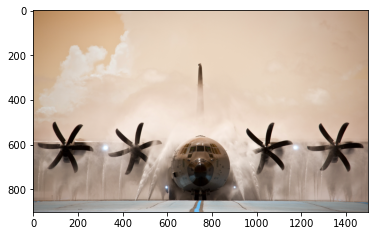

In [5]:
plt.imshow(img_array[1869], cmap='gray')  # graph it
plt.show()  # display!

In [31]:
import random
# shuffle our training data
random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])
# Just a quick peek on our shuffled data
# The reason we do this is so that our algorithm can properly learn the images, if they were sequential the 
# the model would get easily confused and have incorrect weights and might not reach optimality

2
0
0
5
0
1
1
1
1
1


In [32]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0][:].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [33]:
# Normalize the data
X = X/255.0

# Split the data into train, valid, and test sets into 70-20-10 split , X_valid, X_test 
X_train, y_train = X[0:5956], y[0:5956]
X_valid, y_valid = X[5956:7658], y[5956:7658]
X_test, y_test = X[7658:8510], y[7658:8510]

### Model 1

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# Layer 1
model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 3
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 4
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 5
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
# Layer 6
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# Layer 7
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# Layer 8
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.45))
# Layer 9
model.add(Dense(6))
model.add(Activation('relu'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 98, 98, 128)       1280      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 47, 47, 128)       147584    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 5, 5, 128)        

In [18]:
model.fit(X_train, y_train, batch_size=128, epochs=20,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/20
5956/5956 [==============================] - 83s 14ms/sample - loss: 2.1801 - accuracy: 0.2764 - val_loss: 2.0877 - val_accuracy: 0.2174
Epoch 2/20
5956/5956 [==============================] - 76s 13ms/sample - loss: 1.8081 - accuracy: 0.3769 - val_loss: 1.9643 - val_accuracy: 0.2932
Epoch 3/20
5956/5956 [==============================] - 74s 12ms/sample - loss: 1.6429 - accuracy: 0.4251 - val_loss: 1.9164 - val_accuracy: 0.2180
Epoch 4/20
5956/5956 [==============================] - 74s 12ms/sample - loss: 1.5572 - accuracy: 0.4537 - val_loss: 1.8855 - val_accuracy: 0.2180
Epoch 5/20
5956/5956 [==============================] - 74s 12ms/sample - loss: 1.4639 - accuracy: 0.4790 - val_loss: 1.8108 - val_accuracy: 0.2714
Epoch 6/20
5956/5956 [==============================] - 75s 13ms/sample - loss: 1.3812 - accuracy: 0.5134 - val_loss: 1.8504 - val_accuracy: 0.2656
Epoch 7/20
5956/5956 [==============================] - 75s 13ms

### Model 2

In [29]:
model2 = Sequential()

model2.add( Conv2D(32, (3,3), activation = 'sigmoid', input_shape=(150,150,1)))
model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add( Conv2D(32, (3,3), activation = 'sigmoid'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add( Conv2D(32, (2,2), activation = 'sigmoid'))
model2.add( Conv2D(32, (2,2), activation = 'sigmoid'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(256, activation='sigmoid'))
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='sigmoid'))
model2.add(Dropout(0.5))

model2.add(Dense(6))
model2.add(Activation('softmax'))

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 71, 71, 32)        9248      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 69, 69, 32)        9248      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 32)      

In [34]:
model2.fit(X_train, y_train, batch_size=128, epochs=20,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/20
5956/5956 [==============================] - 484s 81ms/sample - loss: 1.7894 - accuracy: 0.2062 - val_loss: 1.7832 - val_accuracy: 0.2180
Epoch 2/20
5956/5956 [==============================] - 468s 79ms/sample - loss: 1.7848 - accuracy: 0.2099 - val_loss: 1.7821 - val_accuracy: 0.2180
Epoch 3/20
2176/5956 [=========>....................] - ETA: 4:42 - loss: 1.7857 - accuracy: 0.2222

KeyboardInterrupt: 